In [26]:
import numpy as np
from RNG import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
rand = random(seed=0)

# Binomial distribution
We test the generation of a Binomial RV with three different methods (CDF inversion, using a sequence of n Bernoulli variables, using geometric strings of zeros), and then compare the time it takes to produce a large number of iid variates for different values of n and p

In [28]:
#load matrices from file
grid_time_binomial_cdf = pd.read_csv('results/binomial_cdf_time.txt', header=None, sep=' ')
grid_time_binomial_uniform = pd.read_csv('results/binomial_uniform_time.txt', header=None, sep=' ')
grid_time_binomial_geometric = pd.read_csv('results/binomial_geometric_time.txt', header=None, sep=' ')
grid_time_binomial_cdf.columns = ['p_0.{}'.format(i) for i in range(1,len(grid_time_binomial_cdf.columns)+1)]
grid_time_binomial_uniform.columns = ['p_0.{}'.format(i) for i in range(1,len(grid_time_binomial_uniform.columns)+1)]
grid_time_binomial_geometric.columns = ['p_0.{}'.format(i) for i in range(1,len(grid_time_binomial_geometric.columns)+1)]

In [29]:
n = [r'$10^{}$'.format(i) for i in range(1,len(grid_time_binomial_cdf.index)+1)]
p = ['{:.1f}'.format(0.1*i) for i in range(1,len(grid_time_binomial_cdf.columns)+1)]

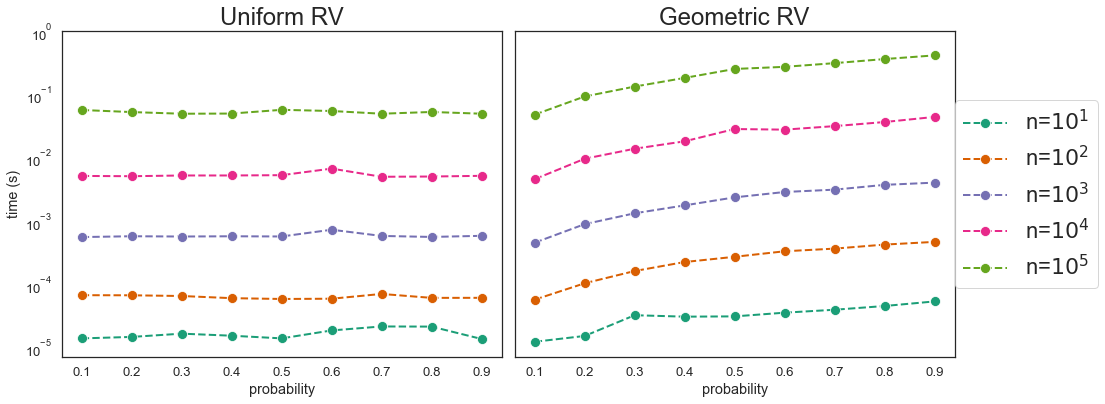

In [30]:
fig,ax=plt.subplots(1,2, figsize=(16,6))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
lw=2
ms=10
ls = '--'
m = 'o'
col = 0  
for l in ['uniform','geometric']:
    a = pd.read_csv('results/binomial_%s_time.txt' % l, header=None, sep=' ')
    for i in range(len(grid_time_binomial_cdf.index)):
        g=sns.lineplot(x=p, y=a.iloc[i,:], ax=ax[col], linewidth=lw, markersize=ms, linestyle=ls,
                    marker=m, label='n={}'.format(n[i]))
        
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.)
    col+=1
ax[0].get_legend().remove()
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylim(0.7*10**-5, 1)
ax[1].set_ylim(ax[0].get_ylim())
ax[0].set_ylabel('time (s)')
ax[1].set_ylabel('')
ax[0].set_xlabel('probability')
ax[1].set_xlabel('probability')
ax[0].set_title('Uniform RV')
ax[1].set_title('Geometric RV')
ax[1].set_yticklabels([])
fig.subplots_adjust(hspace=.0, wspace=0.03)
fig.savefig('results/binomial_time_unif_cdf.pdf', bbox_inches='tight')
  

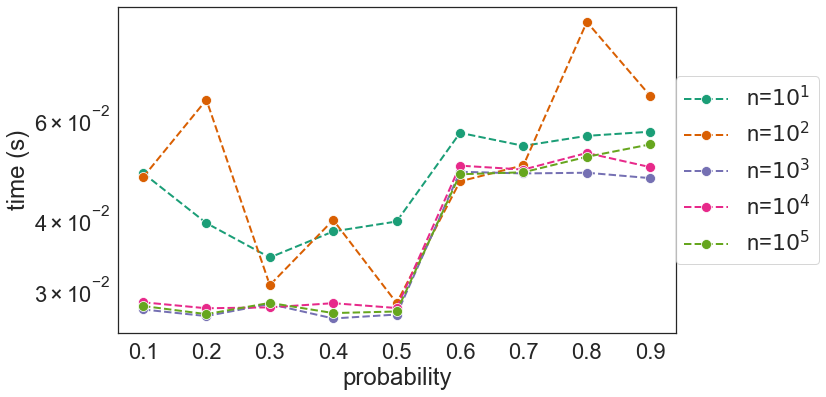

In [31]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
for i in range(len(grid_time_binomial_cdf.index)):
        g=sns.lineplot(x=p, y=grid_time_binomial_cdf.iloc[i,:], ax=ax, linewidth=lw, markersize=ms, linestyle=ls,
                    marker=m, label='n={}'.format(n[i]))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.)
ax.set_ylabel('time (s)')
ax.set_xlabel('probability')
ax.set_yscale('log')

In [32]:
# plot best
N = 1000
n = 1000
p = 0.2
r1 = rand.binomial(n,p,size=N, method='cdf', compute_time=True)
r2 = rand.binomial(n,p,size=N, method='uniform', compute_time=True)
r3 = rand.binomial(n,p,size=N, method='geometric', compute_time=True)
rn_binomial = pd.DataFrame(np.array([r1[0],r1[1],r2[0],r2[1],r3[0],r3[1]]).T)
rn_binomial.columns = ['cdf','time_cdf', 'uniform','time_uniform', 'geometric','time_geometric']

# Poisson distribution
We test the generation of a Poisson RV with three different methods (CDF inversion, generating elements with exponential distribution and its optimized version), and then compare the time it takes to produce a large number of iid variates for different values of $\lambda$

In [33]:
grid_time_pois_cdf = np.loadtxt('results/poisson_cdf_time.txt')
grid_time_pois_exp = np.loadtxt('results/poisson_exp_time.txt')
grid_time_pois_exp_opt = np.loadtxt('results/poisson_exp_opt_time.txt')
lam = [i for i in  range(1,25)]


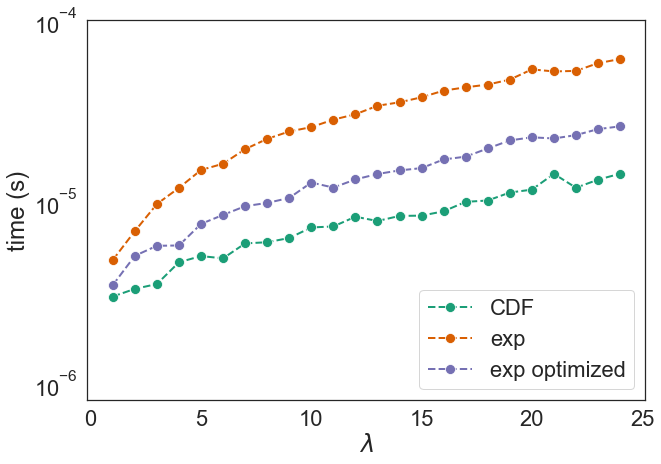

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
sns.lineplot(x=lam, y=grid_time_pois_cdf, ax=ax, linewidth=lw, markersize=ms, linestyle=ls,
                    marker=m, label='CDF')
g=sns.lineplot(x=lam, y=grid_time_pois_exp, ax=ax, linewidth=lw, markersize=ms, linestyle=ls,
                    marker=m, label='exp')
g=sns.lineplot(x=lam, y=grid_time_pois_exp_opt, ax=ax, linewidth=lw, markersize=ms, linestyle=ls,
                    marker=m, label='exp optimized')
ax.set_ylabel('time (s)')
ax.set_xlabel(r'$\lambda$')
ax.set_yscale('log')
ax.set_ylim(0.8*10**-6, 0.7*10**-4)
ax.set_yticks([10**-6, 10**-5, 10**-4])
ax.legend(loc='lower right')
fig.savefig('results/poisson_time.pdf', bbox_inches='tight')

# Uniform distribution: parameters of LCG

In [35]:
from RNG import random

In [36]:
# Consider the two LCGs: LCG1: a = 18, m = 101; LCG2: a = 2, m = 101
rng1 = random(1)
rng2 = random(1)
N=301

lcg1 = rng1.uniform(0,1,size=N, method='wide', a=18, m=101)
lcg2 = rng2.uniform(0,1,size=N, method='wide', a=2, m=101)

In [37]:
# Check whether they are full period: The period P is at most m, but can be smaller 
# depending on the other parameters. If the period is m, the LCG is said to have full period.
full_period_lcg1 = True
full_period_lcg2 = True

def check_full_period(a, m, seed):
    rng = random(seed)
    r = rng.uniform(0,1,size=m, method='wide', a=a, m=m)
    for i in range(1,m):
        if r[i] == r[0] and i!=m-1:
            return "period is {}, less than m".format(i)
        elif r[i] == r[0] and i==m-1:
            return "period is m ({}), the PRNG is full period".format(m)
    return "period is {}, more than m".format(i)

print("LCG 1:", check_full_period(18, 101, 1))
print("LCG 2:", check_full_period(2, 101, 1))

LCG 1: period is m (101), the PRNG is full period
LCG 2: period is m (101), the PRNG is full period


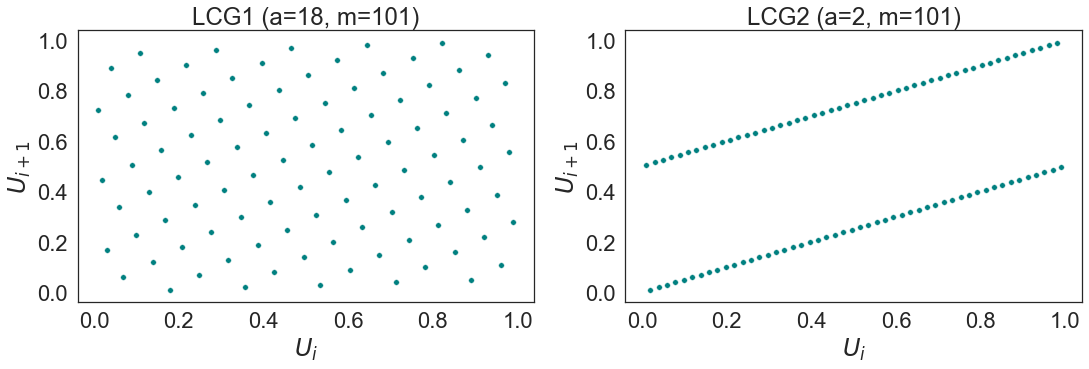

In [38]:
# Plot all pairs (Ui, Ui+1) in a unit square and comment the results

fig, ax = plt.subplots(1,2,figsize=(18,5))
size = 30
sns.set_theme(style='white',palette='Dark2',font_scale=2)
sns.scatterplot(x=lcg1[1:], y=np.roll(lcg1, 1)[1:], color='teal',ax=ax[0],  marker='o', s=size)
sns.scatterplot(x=lcg2[1:], y=np.roll(lcg2, 1)[1:], color='teal',ax=ax[1],  marker='o', s=size)
ax[0].set_title('LCG1 (a=18, m=101)')
ax[1].set_title('LCG2 (a=2, m=101)')
ax[0].set_xlabel(r'$U_i$')
ax[1].set_xlabel(r'$U_i$')
ax[0].set_ylabel(r'$U_{i+1}$')
ax[1].set_ylabel(r'$U_{i+1}$')
fig.savefig('results/lcg_params_study.pdf', bbox_inches='tight')

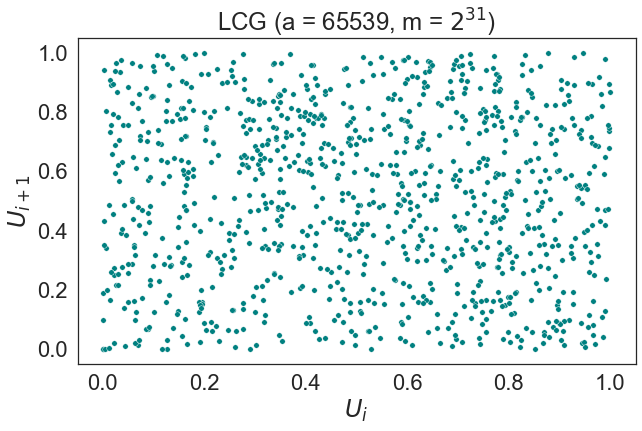

In [39]:
# 5. Consider the LCG with a = 65539, m = 2^31
# a. Plot all pairs (Ui, Ui+1) in a unit square and comment the results
rng = random(1)
N=1000

lcg = rng1.uniform(0,1,size=N, method='wide', a=65539, m=2**(31))

fig, ax = plt.subplots(figsize=(10,6))
size = 30
sns.set_theme(style='white',palette='Dark2',font_scale=2)
sns.scatterplot(x=lcg[1:], y=np.roll(lcg, 1)[1:], color='teal',ax=ax,  marker='o', s=size)
ax.set_title(r'LCG (a = 65539, m = $2^{31}$)')
ax.set_xlabel(r'$U_i$')
ax.set_ylabel(r'$U_{i+1}$')
fig.savefig('results/lcg_uniform.pdf', bbox_inches='tight')

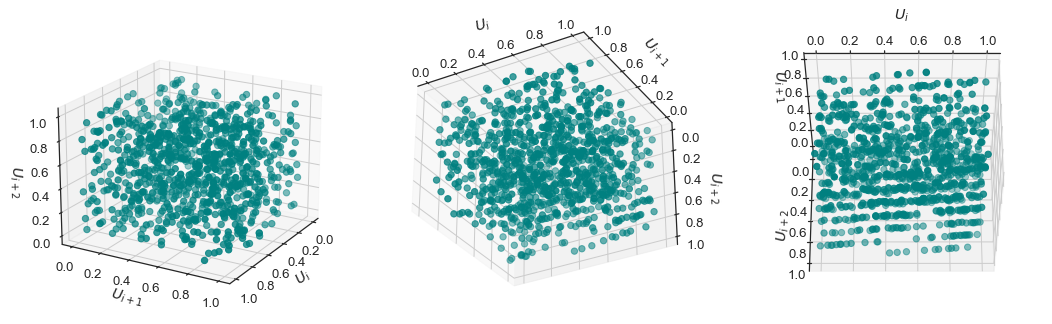

In [40]:
# b. Plot all triples (Ui, Ui+1, Ui+2) in a unit cube and comment the results
size = 40
x = lcg[2:]
y = np.roll(lcg, 1)[2:]
z = np.roll(lcg, 2)[2:]
sns.set_theme(style='white',palette='Dark2',font_scale=1.2)

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(131, projection = '3d')
ax.set_xlabel(r'$U_i$')
ax.set_ylabel(r'$U_{i+1}$')
ax.set_zlabel(r"$U_{i+2}$")
ax.scatter(x, y, z, c='teal', marker='o', s=size)
ax.view_init(20, 30)
ax2 = fig.add_subplot(132, projection = '3d')
ax2.set_xlabel(r'$U_i$')
ax2.set_ylabel(r'$U_{i+1}$')
ax2.set_zlabel(r"$U_{i+2}$")
ax2.scatter(x, y, z, c='teal', marker='o', s=size)
ax2.view_init(-210, -120)
ax3 = fig.add_subplot(133, projection = '3d')
ax3.set_xlabel(r'$U_i$')
ax3.set_ylabel(r'$U_{i+1}$')
ax3.set_zlabel(r"$U_{i+2}$")
ax3.scatter(x, y, z, c='teal', marker='o', s=size)
ax3.view_init(-210, -90)
fig.savefig('results/lcg_3d.pdf', bbox_inches='tight')
